<h1><center>Języki Programowania w Analize Danych</center></h1>
<h3><center><ul style="list-style: none;">
    <li>Mateusz Gałasiński 234054</li>
    <li>Jakub Kurek 234078</li>
    </ul></center></h3> 
<h2><center>Zadanie 1 - Analiza statystyczna dla wybranego zbioru danych</center></h2>

### Additional setup

In [1]:
# install additional packages
!pip install k3d > /dev/null
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as pypl
from pandas import read_csv
import json

## Configuration

In [3]:
class Config(object):
    def __init__(self, dataSourceUrl, quantitativeColumns, qualitativeColumns):
        self.dataSourceUrl = dataSourceUrl
        self.quantitativeColumns = quantitativeColumns
        self.qualitativeColumns = qualitativeColumns
def as_config(dct):
    return Config(
        dct['dataSourceUrl'],
        dct['quantitativeColumns'],
        dct['qualitativeColumns'],)
json_config ="""
{
    "dataSourceUrl": "/home/jovyan/host-note/fertility_Diagnosis.data",
    "quantitativeColumns": [
        "season",
        "childish_disease", 
        "accident_trauma", 
        "surgical_treatmnent",
        "fevers", 
        "alcohol_consumption", 
        "smoking_habit", 
        "output_diagnosis"
    ],
    "qualitativeColumns": [
        "age", 
        "hours_sitting"
    ]
}"""
config = json.loads(json_config, object_hook = as_config)

## Data description

In [4]:
for line in [line for line in Path('/home/jovyan/host-note/fertility_Diagnosis.names').read_text().splitlines() if line]:
    print(line)

Attribute Information:
Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)
Age at the time of analysis. 18-36 (0, 1)
Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)
Accident or serious trauma 1) yes, 2) no. (0, 1)
Surgical intervention 1) yes, 2) no. (0, 1)
High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)
Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)
Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)
Number of hours spent sitting per day ene-16 (0, 1)
Output: Diagnosis normal (N), altered (O) 


## Divide into qualitative and quantitative

In [5]:
dataset = read_csv(config.dataSourceUrl, header=0)
qualitativeDataset = dataset[config.qualitativeColumns]
quantitativeDataset = dataset[config.quantitativeColumns]
dataset.shape

(100, 10)

## 1. Describe
*Dla poszczególnych atrybutów wyznaczyć medianę, minimum i maximum dla cech ilościowych i dominantę dla cech jakościowych.*

In [6]:
quantitativeDataset.describe()

,season,childish_disease,accident_trauma,surgical_treatmnent,fevers,alcohol_consumption,smoking_habit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000
std,0.796725,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728
min,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000
25%,-1.000000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000
50%,-0.330000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modes

In [7]:
qualitativeDataset.mode()

,age,hours_sitting
0,0.67,0.25


## 2. Correlation matrix
*Narysować histogramy dla dwóch cech ilościowych najbardziej ze sobą skorelowanych*

In [8]:
quantitativeDataset.corr()

,season,childish_disease,accident_trauma,surgical_treatmnent,fevers,alcohol_consumption,smoking_habit
season,1.000000,-0.176509,-0.096274,-0.006210,-0.221818,-0.041290,-0.028085
childish_disease,-0.176509,1.000000,0.162936,-0.140972,0.075645,0.038538,0.090535
accident_trauma,-0.096274,0.162936,1.000000,0.103166,-0.082278,-0.242722,0.110157
surgical_treatmnent,-0.006210,-0.140972,0.103166,1.000000,-0.231598,-0.075858,-0.053448
fevers,-0.221818,0.075645,-0.082278,-0.231598,1.000000,-0.000831,-0.007527
alcohol_consumption,-0.041290,0.038538,-0.242722,-0.075858,-0.000831,1.000000,-0.184926
smoking_habit,-0.028085,0.090535,0.110157,-0.053448,-0.007527,-0.184926,1.000000


### Histogram for attributes with highest correlation


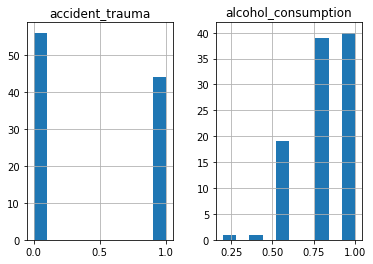

In [9]:
corr = quantitativeDataset.corr()
max = -2
c, r = "", ""
for column in corr:
    for row in corr:
        if row != column and np.absolute(corr[column][row]) > max:
            max = np.absolute(corr[column][row])
            c = column
            r = row
hist = quantitativeDataset.hist(column=[c, r])

# Births

*Dla danych Births zbadać hipotezę, że dzienna średnia liczba urodzeń dzieci wynosi: 10000  
(poziom istotności statystycznej 5%)*

Średnia ilość urodzeń w ciagu dnia to: 9648.940177960301
Odchylenie standardowe ilości urodzeń w ciagu dnia to: 1127.3152293611754
Wartość krytyczna: 1.9602888281476816
9623.084535784074 – 9674.795820136529
Hipoteza, głosząca, że średnia wartość 'births' jest 10000 z poziomem ufności: 95.0% została obalona!


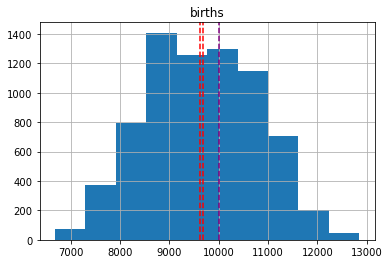

In [10]:
from calendar import isleap
from scipy.stats import t
hypothesis_z = 1000_0
alpha = 0.05
column_name = "births"
data = read_csv("/home/jovyan/host-note/births.csv", header=0)
num_of_days = data['year'].unique().size * 365 + np.sum(np.array(list(map(lambda y: isleap(y), data['year'].unique()))))
mean_b = data[column_name].sum() / num_of_days
print(f"Średnia ilość urodzeń w ciagu dnia to: {mean_b}")
std_b = data[column_name].std()
print(f"Odchylenie standardowe ilości urodzeń w ciagu dnia to: {std_b}")
tperc_b = t.ppf(1 - alpha/2, data['births'].count()-1)
print(f"Wartość krytyczna: {tperc_b}")
b_max = mean_b + tperc_b*std_b/(np.sqrt(data[column_name].count()))
b_min = mean_b - tperc_b*std_b/(np.sqrt(data[column_name].count()))
print(f"{b_min} – {b_max}")

if not (hypothesis_z > b_min and hypothesis_z < b_max):
    print(f"Hipoteza, głosząca, że średnia wartość '{column_name}' jest {hypothesis_z} z poziomem ufności: {(1 - alpha)*100}% została obalona!")
else:
    print("Hipoteza jest OK!")

fig = pypl.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Births h")
data.hist(column=[column_name], ax=ax)
pypl.axvline(x=b_min, linestyle='--', color='red')
pypl.axvline(x=b_max, linestyle='--', color='red')
lin = pypl.axvline(x=hypothesis_z, linestyle='--', color='purple')